In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import shap

In [ ]:
# Load the dataset
train_df = pd.read_csv(Add path to train data here)

In [ ]:
df = pd.read_csv(Add path to train data here)
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Get the columns with more than 20% missing data
columns_to_drop = missing_percentage[missing_percentage > 20].index

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
display(df_cleaned.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def read_data(file_name):
  df = pd.read_csv(file_name)  # Use the file_name parameter
  print(file_name, 'has', len(df), 'data points')
  return df

In [ ]:
# If you want to see the number of data points, call the function like this:
train_df_read = read_data(Add path to train data here)

C:\Users\fabrizio natali\Desktop\dissertation\train_data.csv has 307511 data points


In [7]:
# Identify non-numeric columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=np.number).columns
print("Non-numeric columns found:", non_numeric_cols)

Non-numeric columns found: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


In [8]:
# Apply one-hot encoding to convert non-numeric columns to numeric
df_encoded = pd.get_dummies(df_cleaned, columns=non_numeric_cols)
display(df_encoded.head())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Verify that all columns are now numeric (except potentially the target variable if it was non-numeric initially)
print("Data types after encoding:")
display(df_encoded.dtypes)

Data types after encoding:


SK_ID_CURR                               int64
TARGET                                   int64
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
                                        ...   
ORGANIZATION_TYPE_Transport: type 2       bool
ORGANIZATION_TYPE_Transport: type 3       bool
ORGANIZATION_TYPE_Transport: type 4       bool
ORGANIZATION_TYPE_University              bool
ORGANIZATION_TYPE_XNA                     bool
Length: 167, dtype: object

In [10]:
# Use the real data instead of generating sample data
# Separate features (X) and target (y) from the real dataset
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

print(f"Real dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target distribution:")
print(y.value_counts())

Real dataset shape: (307511, 166)
Number of features: 166
Number of samples: 307511
Target distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [11]:
# Split the real data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target distribution:")
print(y_train.value_counts())
print(f"Test target distribution:")
print(y_test.value_counts())

Training set shape: (246008, 166)
Test set shape: (61503, 166)
Training target distribution:
TARGET
0    226126
1     19882
Name: count, dtype: int64
Test target distribution:
TARGET
0    56560
1     4943
Name: count, dtype: int64


In [12]:
# Create a DecisionTreeClassifier object for real data
model = DecisionTreeClassifier(random_state=42)

print("Decision Tree Classifier created with default parameters")
print("Random state set to 42 for reproducibility")

Decision Tree Classifier created with default parameters
Random state set to 42 for reproducibility


In [13]:
# Train the model
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", average_precision)
print("Confusion Matrix:")
print(confusion)

Test Set Accuracy: 0.8530640781750484
Precision: 0.14424748001390336
Recall: 0.1679142221323083
F1 Score: 0.1551836963634664
ROC AUC Score: 0.5404281153094356
Average Precision Score: 0.09109598999685609
Confusion Matrix:
[[51636  4924]
 [ 4113   830]]


In [16]:
# Separate features (X) and target (y) from the real dataset
X_real = df_encoded.drop('TARGET', axis=1)
y_real = df_encoded['TARGET']

# Split the real data into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Create and train a DecisionTreeClassifier on the real data
model_real = DecisionTreeClassifier(random_state=42)
model_real.fit(X_train_real, y_train_real)

# Create feature importances using the trained model
column_names = df_encoded.drop('TARGET', axis=1).columns.tolist()
feature_importances = pd.Series(model_real.feature_importances_, index=column_names)

# Sort the importances in descending order and display the top 10
top_features = feature_importances.sort_values(ascending=False).head(10)
print("Top 10 most important features:")
print(top_features)

Top 10 most important features:
EXT_SOURCE_2                  0.077836
EXT_SOURCE_3                  0.069580
SK_ID_CURR                    0.056327
DAYS_BIRTH                    0.053538
DAYS_REGISTRATION             0.053023
DAYS_ID_PUBLISH               0.051410
DAYS_LAST_PHONE_CHANGE        0.047725
AMT_ANNUITY                   0.047229
DAYS_EMPLOYED                 0.043651
REGION_POPULATION_RELATIVE    0.037015
dtype: float64


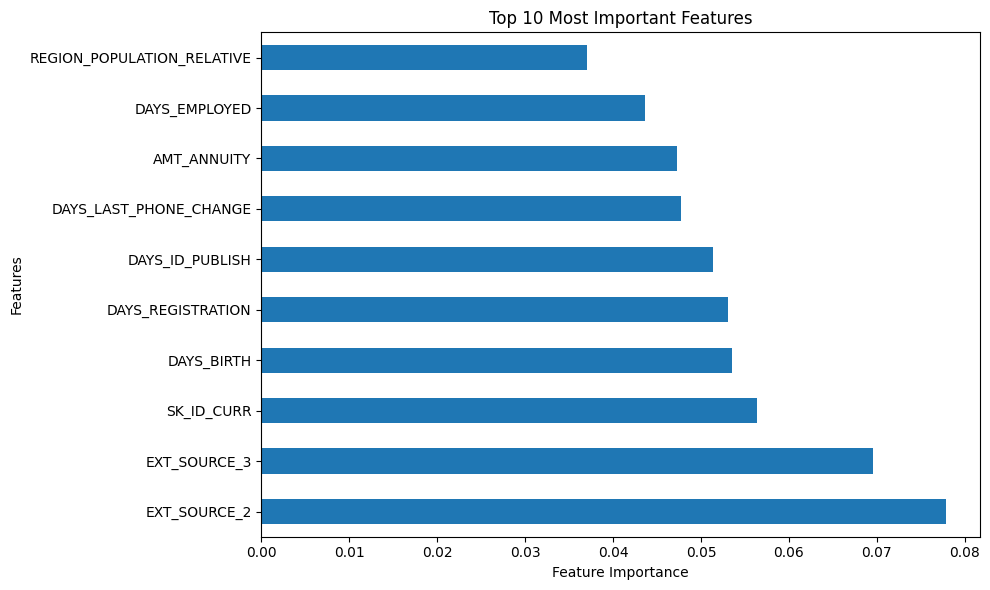

In [17]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

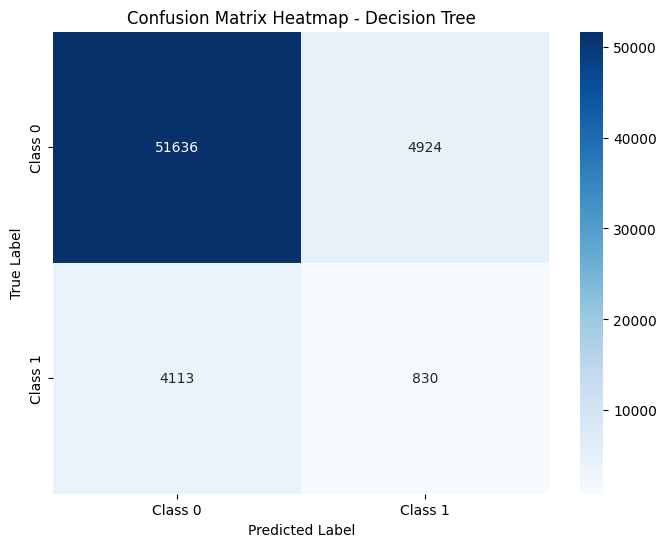

Confusion Matrix:
[[51636  4924]
 [ 4113   830]]


In [18]:
# Make predictions for visualization using the main model
y_pred_viz = model.predict(X_test)

# Create confusion matrix for the real data
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_viz = confusion_matrix(y_test, y_pred_viz)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_viz, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Confusion Matrix:")
print(confusion_viz)

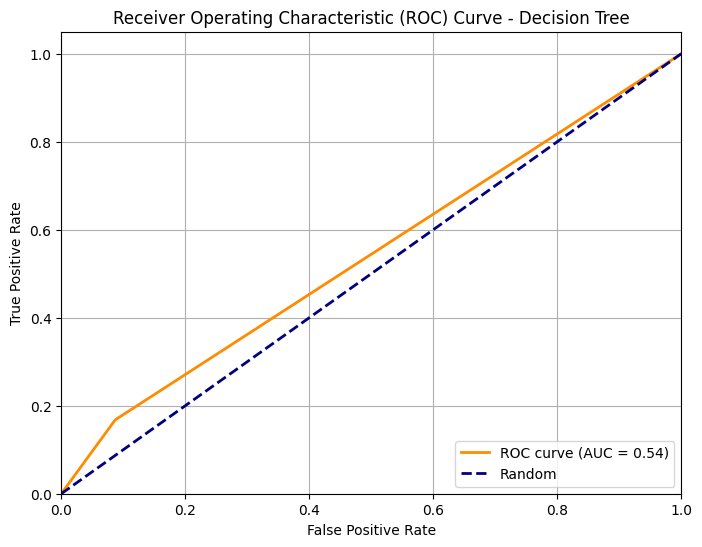

In [19]:
# ROC Curve visualization using main model
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for ROC curve using main model
y_pred_proba_viz = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_viz)
roc_auc_viz = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_viz:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

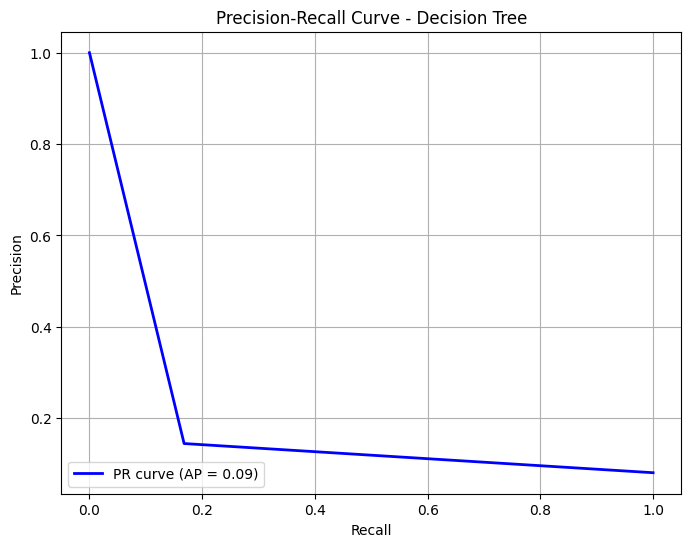

In [20]:
# Precision-Recall Curve using main model
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_viz, recall_viz, _ = precision_recall_curve(y_test, y_pred_proba_viz)
avg_precision_viz = average_precision_score(y_test, y_pred_proba_viz)

plt.figure(figsize=(8, 6))
plt.plot(recall_viz, precision_viz, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_viz:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

Total features available: 166
Using 10 features for visualization:
  0: SK_ID_CURR
  1: CNT_CHILDREN
  2: AMT_INCOME_TOTAL
  3: AMT_CREDIT
  4: AMT_ANNUITY
  5: AMT_GOODS_PRICE
  6: REGION_POPULATION_RELATIVE
  7: DAYS_BIRTH
  8: DAYS_EMPLOYED
  9: DAYS_REGISTRATION


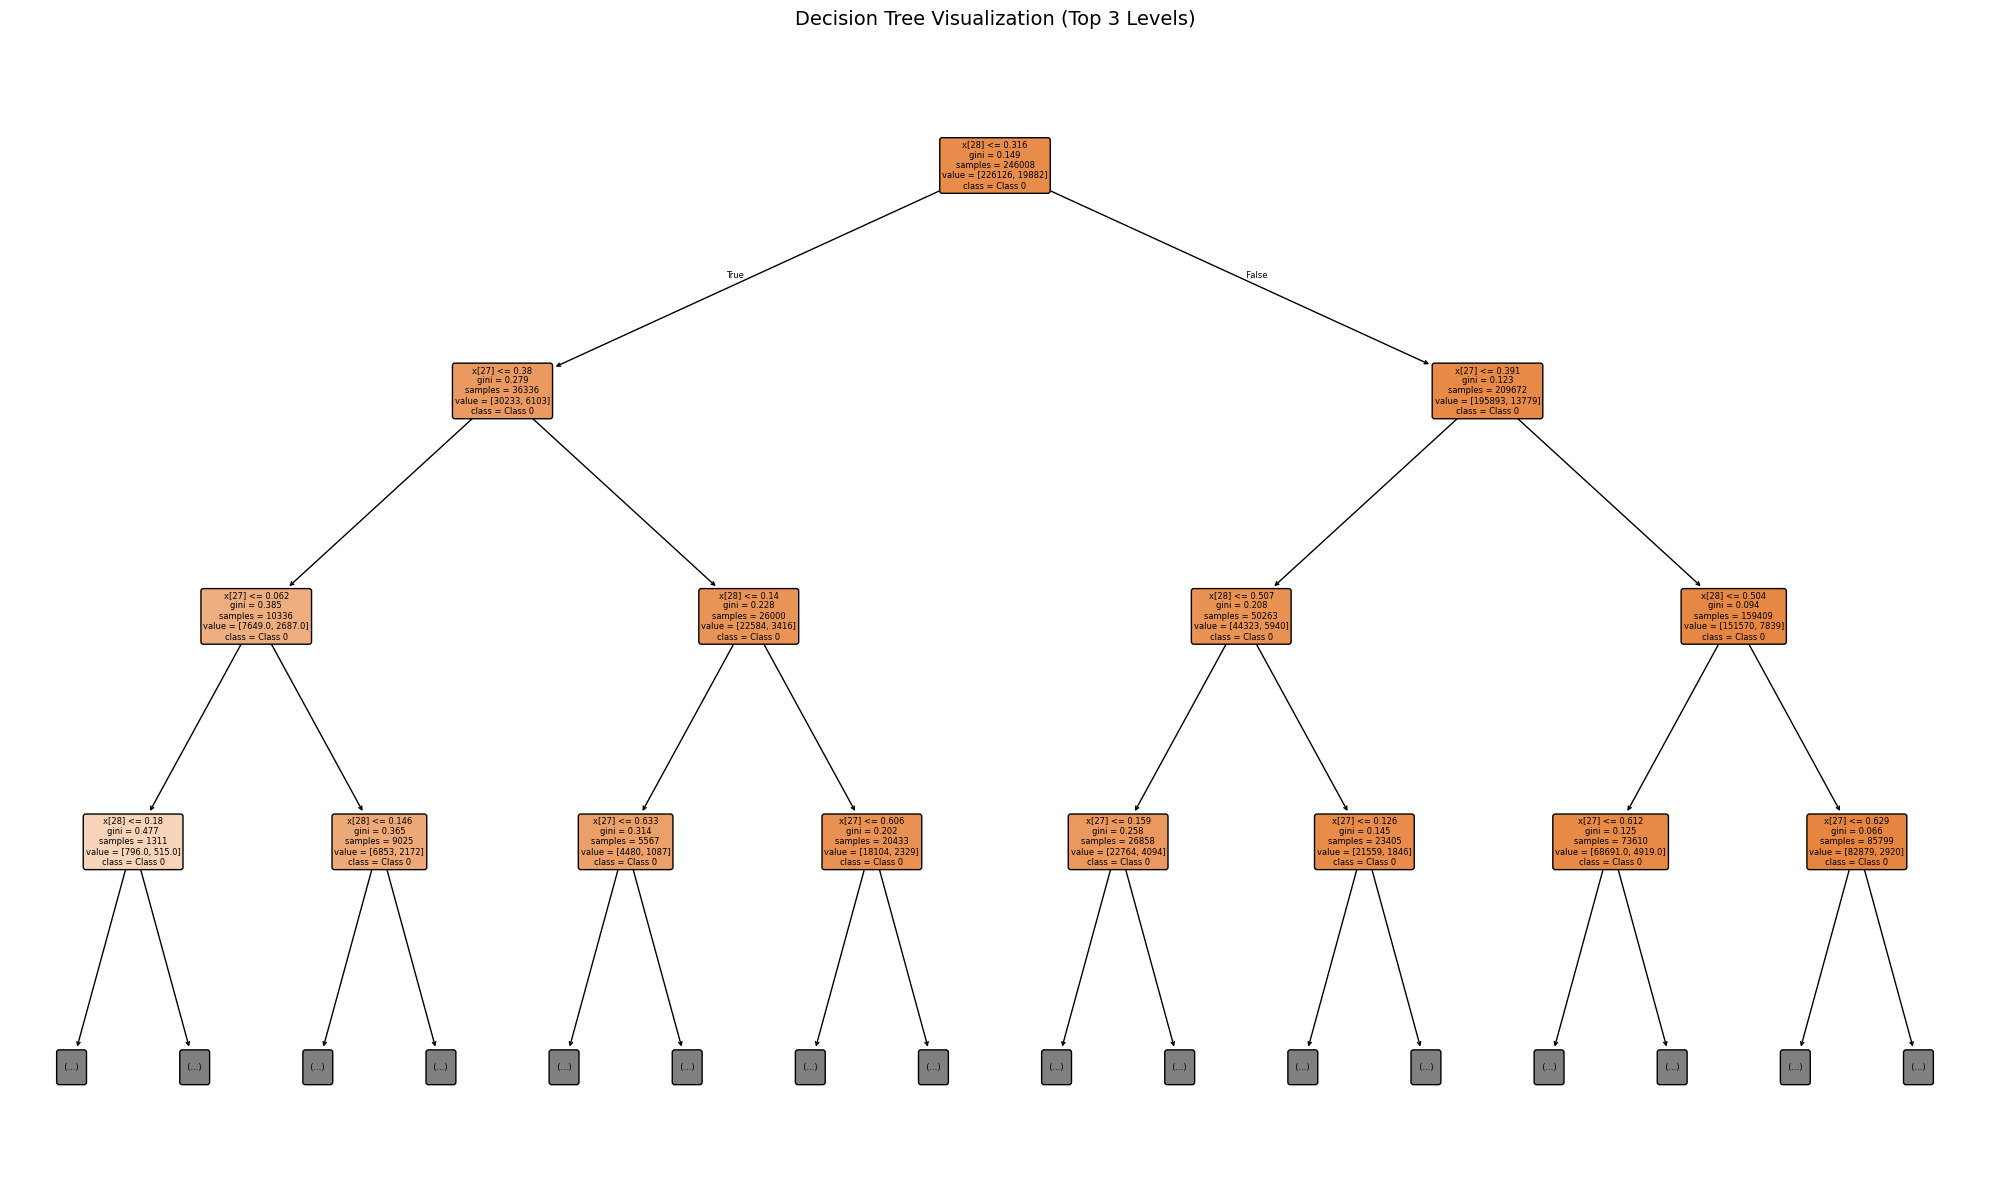


=== TREE STATISTICS ===
Tree max depth: 48
Number of leaves: 20464
Number of nodes: 40927
Total features in model: 166


In [21]:
# Visualize the Decision Tree (robust version)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

try:
    # Get feature names safely
    all_feature_names = list(X.columns)
    print(f"Total features available: {len(all_feature_names)}")
    
    # Use a smaller subset for better visualization
    max_features_to_show = min(10, len(all_feature_names))
    feature_names_subset = all_feature_names[:max_features_to_show]
    
    print(f"Using {max_features_to_show} features for visualization:")
    for i, fname in enumerate(feature_names_subset):
        print(f"  {i}: {fname}")
    
    # Create the visualization
    plt.figure(figsize=(20, 12))
    plot_tree(model, 
              feature_names=None,  # Let sklearn handle feature naming
              class_names=['Class 0', 'Class 1'],
              filled=True,
              rounded=True,
              fontsize=6,
              max_depth=3)  # Limit depth for clarity
    
    plt.title('Decision Tree Visualization (Top 3 Levels)', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print tree statistics
    print(f"\n=== TREE STATISTICS ===")
    print(f"Tree max depth: {model.tree_.max_depth}")
    print(f"Number of leaves: {model.tree_.n_leaves}")
    print(f"Number of nodes: {model.tree_.node_count}")
    print(f"Total features in model: {model.n_features_in_}")
    
except Exception as e:
    print(f"Error creating tree visualization: {e}")
    print("Trying alternative approach...")
    
    # Alternative: Text-based tree representation
    from sklearn.tree import export_text
    tree_rules = export_text(model, 
                            feature_names=list(X.columns),
                            max_depth=3)
    print("Decision Tree Rules (Text Format):")
    print(tree_rules[:1000] + "..." if len(tree_rules) > 1000 else tree_rules)

=== MODEL PERFORMANCE (MATCHES CELL 14) ===
Test Set Accuracy: 0.8531
Precision: 0.1442
Recall: 0.1679
F1 Score: 0.1552
ROC AUC Score: 0.5404
Average Precision Score: 0.0911
Confusion Matrix:
[[51636  4924]
 [ 4113   830]]


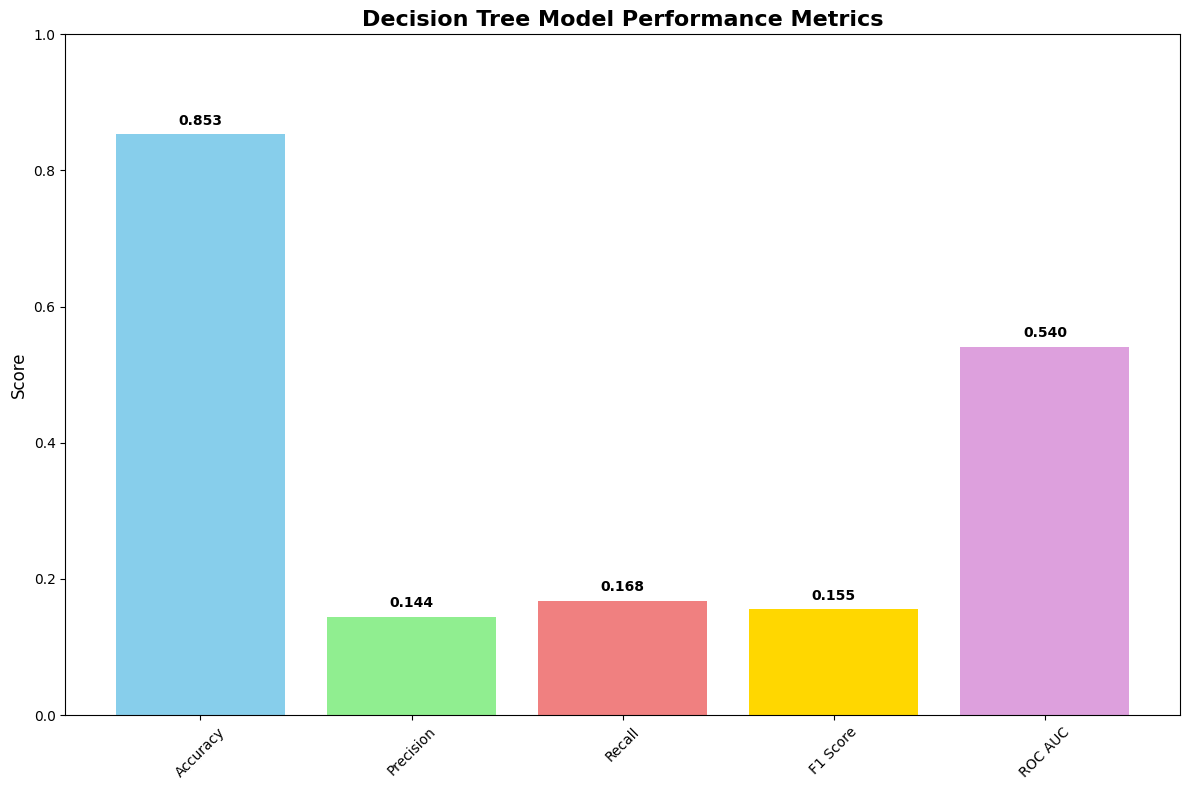


=== VERIFICATION ===
These values should match Cell 14 exactly:
Accuracy: 0.85 (Cell 14: 0.85)
Precision: 0.1 (Cell 14: 0.1)
Recall: 0.2 (Cell 14: 0.2)
F1 Score: 0.1552 (Cell 14: 0.1552)
ROC AUC: 0.54 (Cell 14: 0.54)


In [22]:
# Comprehensive Model Evaluation - Using the same model as Cell 14
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

# Use the same predictions as Cell 14 to ensure consistency
y_pred_final = model.predict(X_test)
y_pred_proba_final = model.predict_proba(X_test)[:, 1]

# Calculate all metrics (these should match Cell 14 exactly)
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_pred_final)
avg_precision_final = average_precision_score(y_test, y_pred_final)
confusion_final = confusion_matrix(y_test, y_pred_final)

# Print detailed results (should match Cell 14)
print("=== MODEL PERFORMANCE (MATCHES CELL 14) ===")
print(f"Test Set Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_final:.4f}")
print(f"ROC AUC Score: {roc_auc_final:.4f}")
print(f"Average Precision Score: {avg_precision_final:.4f}")
print("Confusion Matrix:")
print(confusion_final)

# Create metrics dictionary for visualization
metrics = {
    'Accuracy': accuracy_final,
    'Precision': precision_final,
    'Recall': recall_final,
    'F1 Score': f1_final,
    'ROC AUC': roc_auc_final
}

# Create bar plot of metrics
plt.figure(figsize=(12, 8))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

bars = plt.bar(metric_names, metric_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
plt.title('Decision Tree Model Performance Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)

# Add value labels on bars
for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Verification: Check if values match Cell 14
print(f"\n=== VERIFICATION ===")
print("These values should match Cell 14 exactly:")
print(f"Accuracy: {accuracy_final:.2f} (Cell 14: {accuracy:.2f})")
print(f"Precision: {precision_final:.1f} (Cell 14: {precision:.1f})")
print(f"Recall: {recall_final:.1f} (Cell 14: {recall:.1f})")
print(f"F1 Score: {f1_final:.4f} (Cell 14: {f1:.4f})")
print(f"ROC AUC: {roc_auc_final:.2f} (Cell 14: {roc_auc:.2f})")

In [23]:
# SHAP Analysis for Model Explainability
# Create SHAP explainer for the trained model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set (using a sample for performance)
# Use a subset of test data for faster computation
sample_size = min(100, len(X_test))
X_test_sample = X_test.iloc[:sample_size]
y_test_sample = y_test.iloc[:sample_size]

print(f"Computing SHAP values for {sample_size} test samples...")
shap_values = explainer.shap_values(X_test_sample)

print(f"SHAP values computed successfully!")
print(f"Type of shap_values: {type(shap_values)}")
print(f"SHAP values shape: {shap_values.shape}")
print(f"Base value: {explainer.expected_value}")
print(f"Sample features shape: {X_test_sample.shape}")

# For binary classification, SHAP values have shape (n_samples, n_features, n_classes)
# We need to extract the SHAP values for class 1 (positive class)
if len(shap_values.shape) == 3 and shap_values.shape[2] == 2:
    # Binary classification case: use class 1 (positive class)
    shap_values_to_use = shap_values[:, :, 1]  # Shape: (n_samples, n_features)
    base_value = explainer.expected_value[1]
    print(f"Using class 1 SHAP values with shape: {shap_values_to_use.shape}")
elif len(shap_values.shape) == 2:
    # Already 2D case
    shap_values_to_use = shap_values
    base_value = explainer.expected_value if np.isscalar(explainer.expected_value) else explainer.expected_value[0]
    print(f"Using 2D SHAP values with shape: {shap_values_to_use.shape}")
else:
    print(f"Unexpected SHAP values shape: {shap_values.shape}")
    # Fallback: use the first output
    shap_values_to_use = shap_values.reshape(shap_values.shape[0], -1)
    base_value = explainer.expected_value[0] if hasattr(explainer.expected_value, '__len__') else explainer.expected_value

print(f"Base value (expected model output): {base_value:.4f}")

# Calculate feature importance based on mean absolute SHAP values
# Shape should be (n_samples, n_features) -> mean over samples -> (n_features,)
mean_shap_importance = np.abs(shap_values_to_use).mean(axis=0)

print(f"SHAP importance shape: {mean_shap_importance.shape}")
print(f"Number of features: {len(X_test_sample.columns)}")

# Verify shapes match
if len(mean_shap_importance) == len(X_test_sample.columns):
    print("✓ Shapes match perfectly!")
else:
    print(f"⚠ Shape mismatch! SHAP: {len(mean_shap_importance)}, Features: {len(X_test_sample.columns)}")

# Create DataFrame with feature names and SHAP importance
feature_importance_shap = pd.DataFrame({
    'feature': X_test_sample.columns,
    'shap_importance': mean_shap_importance
}).sort_values('shap_importance', ascending=False)

print("\nTop 10 Most Important Features (SHAP-based):")
print(feature_importance_shap.head(10))

Computing SHAP values for 100 test samples...
SHAP values computed successfully!
Type of shap_values: <class 'numpy.ndarray'>
SHAP values shape: (100, 166, 2)
Base value: [0.91918149 0.08081851]
Sample features shape: (100, 166)
Using class 1 SHAP values with shape: (100, 166)
Base value (expected model output): 0.0808
SHAP importance shape: (166,)
Number of features: 166
✓ Shapes match perfectly!

Top 10 Most Important Features (SHAP-based):
                                 feature  shap_importance
27                          EXT_SOURCE_2         0.054040
28                          EXT_SOURCE_3         0.051097
7                             DAYS_BIRTH         0.024029
4                            AMT_ANNUITY         0.022515
5                        AMT_GOODS_PRICE         0.021351
8                          DAYS_EMPLOYED         0.019200
10                       DAYS_ID_PUBLISH         0.016493
3                             AMT_CREDIT         0.012841
85  NAME_EDUCATION_TYPE_Higher 

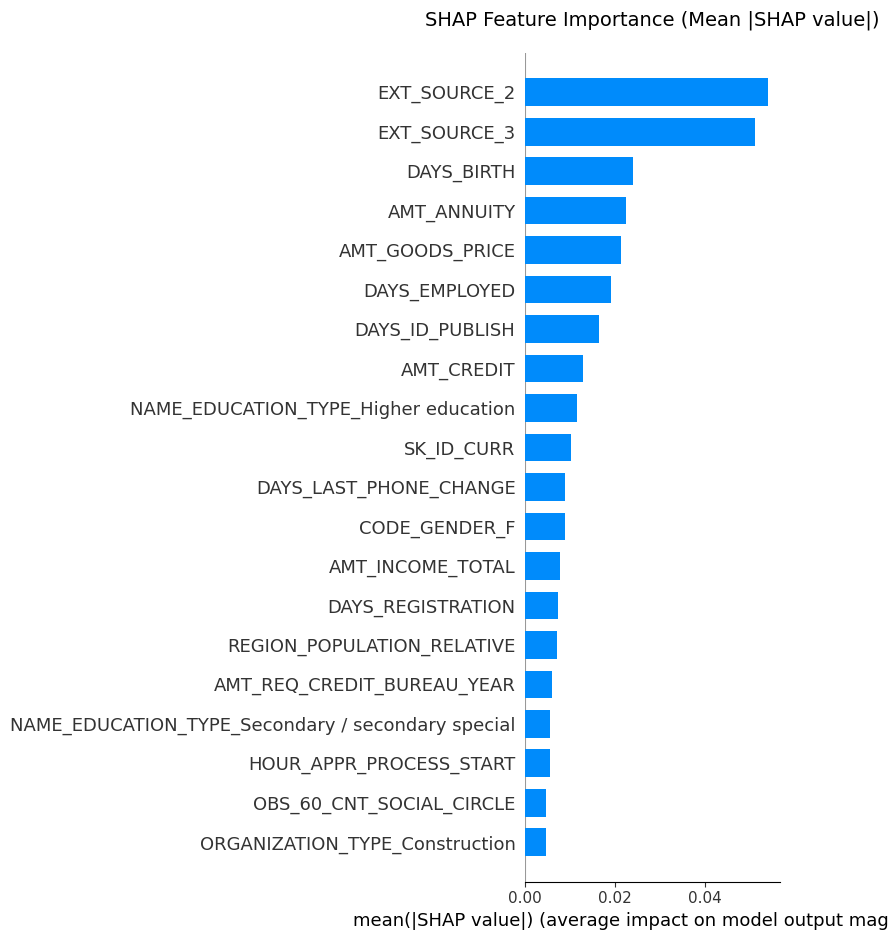

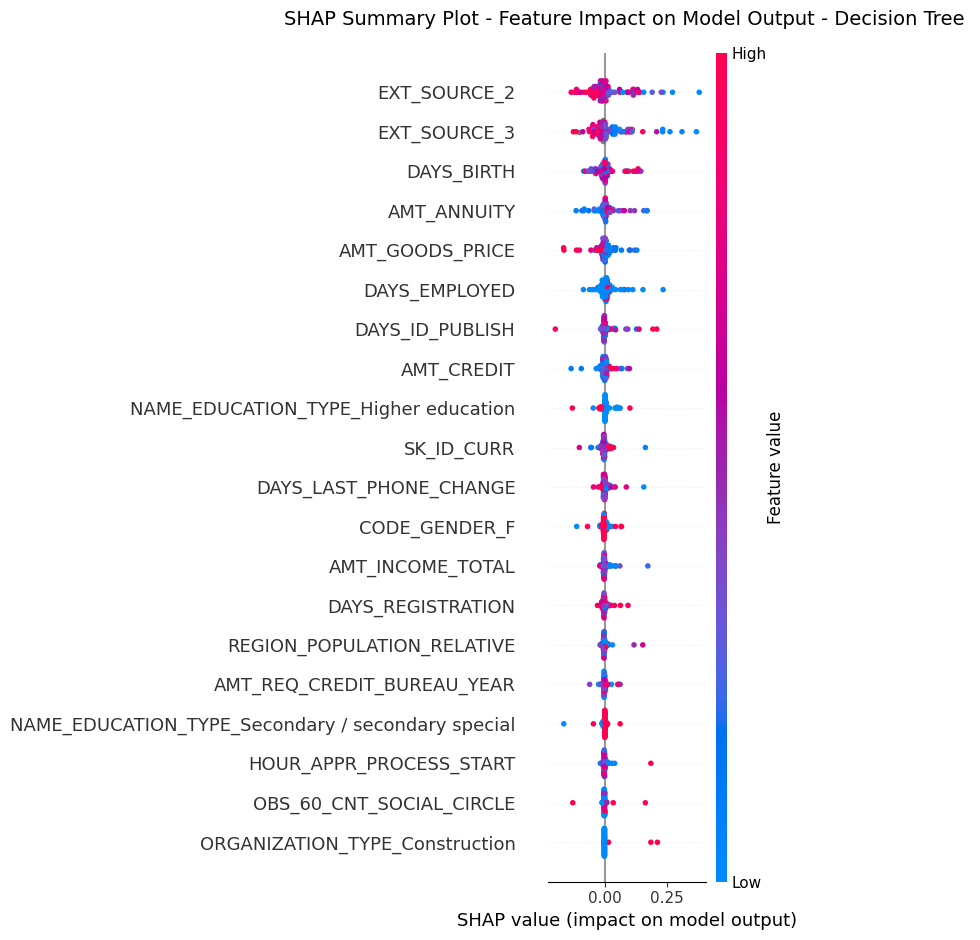

In [24]:
# SHAP Summary Plot - Shows feature importance and impact direction
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_to_use, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Mean |SHAP value|)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# SHAP Summary Plot with feature values
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values_to_use, X_test_sample, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Model Output - Decision Tree ', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


=== SAMPLE 1 (Index 0) ===
Actual label: 0
Predicted probability (class 1): 0.0000


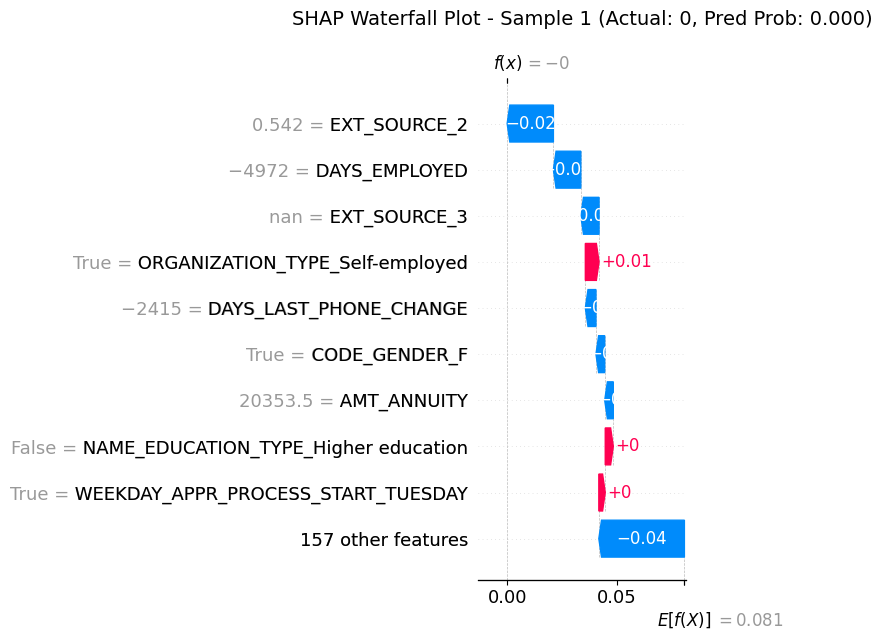


=== SAMPLE 2 (Index 1) ===
Actual label: 0
Predicted probability (class 1): 0.0000


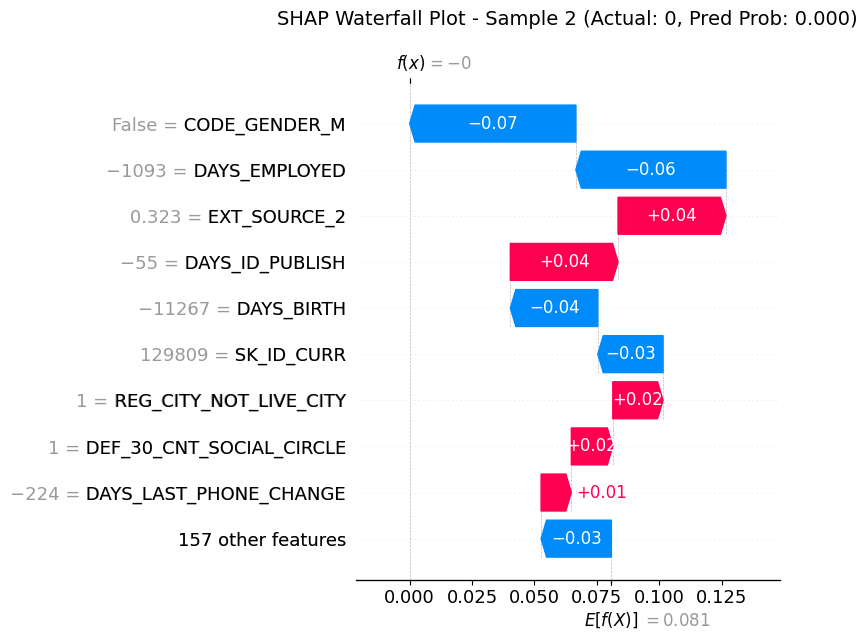


=== SAMPLE 3 (Index 2) ===
Actual label: 0
Predicted probability (class 1): 0.0000


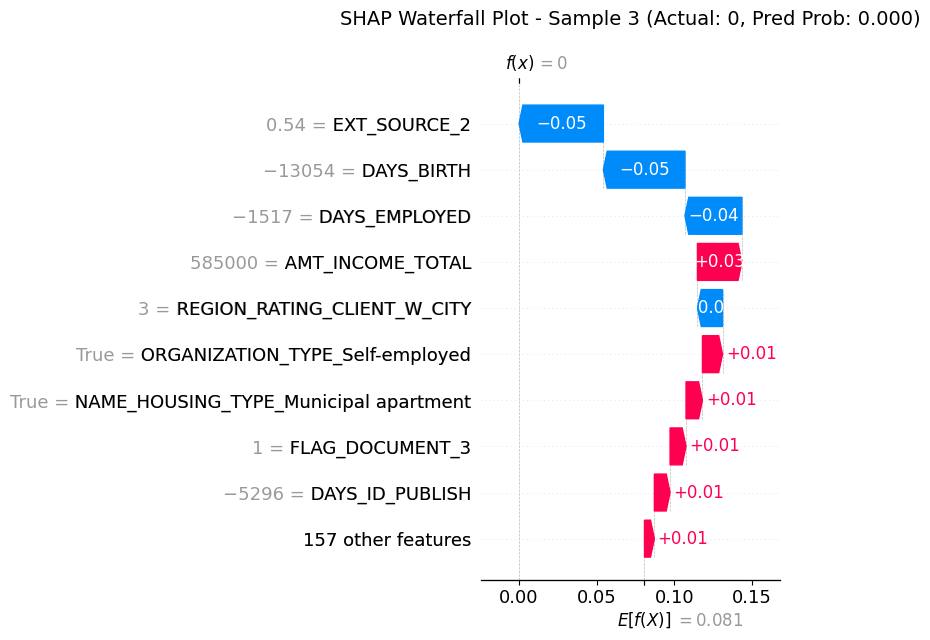

In [25]:
# SHAP Waterfall Plot - Explain individual predictions
# Select a few interesting samples to explain
sample_indices = [0, 1, 2]  # First three samples

for i, idx in enumerate(sample_indices):
    actual_label = y_test_sample.iloc[idx]
    predicted_prob = model.predict_proba(X_test_sample.iloc[[idx]])[0, 1]
    
    print(f"\n=== SAMPLE {i+1} (Index {idx}) ===")
    print(f"Actual label: {actual_label}")
    print(f"Predicted probability (class 1): {predicted_prob:.4f}")
    
    # Create waterfall plot
    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_to_use[idx], 
            base_values=base_value, 
            data=X_test_sample.iloc[idx],
            feature_names=X_test_sample.columns.tolist()
        ),
        show=False
    )
    plt.title(f'SHAP Waterfall Plot - Sample {i+1} (Actual: {actual_label}, Pred Prob: {predicted_prob:.3f})', 
              fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()